# An Observational Study of the Relationship between 2018 FIFA Team Performance and Country Welfare Statistics
*Question: Does a country's performance in FIFA indicate how their country is faring more broadly?*  
**Team Members: (mii7, doa24, ekb72, idm22)**

## Introduction

For this project, we were interested in looking at countries that participated in the 2018 FIFA World Cup to answer different questions about their performance. Considering the top rated teams and the fact that unlike in other leagues, teams are sponsored by their respective countries, this is a great opportunity to examine the relationship (or lack thereof) between country dynamics and team performance.

The are two metrics we will be focusing on to represent team performance; FIFA Ranking, and Expected points. The three main metrics we will use to represent level of support possible from countries are GDP (Gross Domestic Product), industrial production, and life expectancy.

## Hypothesis

Given the above relationships we are trying to investigate, we formed the following hypotheses:

**Country GDP per Capita and Team Performance** : The country's GDP will be strongly and positively correlated with how the team performs  

**Industrial Production and Team Performance** : A country with more producing power in industry will correlate positively with how the team performs  

**Health/Life Expectancy and Team Performance** : The country's life expectancy indicates good living conditions. We are also predicting a positive correlation with performance for this variable.

## Datasheet Q & A

#### Motivation
*The questions in this section are primarily intended to encourage dataset creators to clearly articulate their reasons for creating the dataset and to promote transparency about funding interests.*

• For what purpose was the dataset created? Was there a specific task
in mind? Was there a specific gap that needed to be filled? Please provide
a description.

• Who created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization)?

• Who funded the creation of the dataset? If there is an associated grant, please provide the name of the grantor and the grant name and number.  

• Any other comments?


#### 3.2 Composition
*Dataset creators should read through the questions in this section prior to any data collection and then provide answers once collection is complete. Most of these questions are intended to provide dataset consumers with the information they need to make informed decisions about using the dataset for specific tasks. The answers to some of these questions reveal information
Datasheets for Datasets 5 about compliance with the EU’s General Data Protection Regulation (GDPR) or comparable regulations in other jurisdictions.*  

• What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)? Are there multiple types of instances (e.g., movies, users, and ratings; people and interactions between them; nodes and edges)? Please provide a description.  

• How many instances are there in total (of each type, if appropriate)?  

• Does the dataset contain all possible instances or is it a sample(not necessarily random) of instances from a larger set? If the dataset is a sample, then what is the larger set? Is the sample representative of the larger set (e.g., geographic coverage)? If so, please describe how this representativeness was validated/verified. If it is not representative of the larger set, please describe why not (e.g., to cover a more diverse range of instances, because instances were withheld or unavailable).  

• What data does each instance consist of? “Raw” data (e.g., unprocessed text or images) or features? In either case, please provide a description.  

• Is there a label or target associated with each instance? If so, please provide a description.  

• Is any information missing from individual instances? If so, please provide a description, explaining why this information is missing (e.g., because it was unavailable). This does not include intentionally removed information, but might include, e.g., redacted text.  

• Are relationships between individual instances made explicit (e.g., users’ movie ratings, social network links)? If so, please describe how these relationships are made explicit.  

• Are there recommended data splits (e.g., training, development/validation, testing)? If so, please provide a description of these splits, explaining the rationale behind them.  

• Are there any errors, sources of noise, or redundancies in the dataset? If so, please provide a description.  

• Is the dataset self-contained, or does it link to or otherwise rely on external resources (e.g., websites, tweets, other datasets)? If it links to or relies on external resources, a) are there guarantees that they will exist, and remain constant, over time; b) are there official archival versions of the complete dataset (i.e., including the external resources as they
existed at the time the dataset was created); c) are there any restrictions (e.g., licenses, fees) associated with any of the external resources that might apply to a future user? Please provide descriptions of all external resources and any restrictions associated with them, as well as links or other access points, as appropriate. 6 Gebru et al.  

• Does the dataset contain data that might be considered confidential (e.g., data that is protected by legal privilege or by doctorpatient confidentiality, data that includes the content of individuals’ non-public communications)? If so, please provide a description.  

• Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety? If so, please describe why.  

• Does the dataset relate to people? If not, you may skip the remaining questions in this section.  

• Does the dataset identify any subpopulations (e.g., by age, gender)? If so, please describe how these subpopulations are identified and provide a description of their respective distributions within the dataset.  

• Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.  

• Does the dataset contain data that might be considered sensitive in any way (e.g., data that reveals racial or ethnic origins, sexual orientations, religious beliefs, political opinions or union memberships, or locations; financial or health data; biometric or genetic data; forms of government identification, such as social security numbers; criminal history)? If so, please provide a description.  

• Any other comments?


#### 3.3 Collection Process
*As with the previous section, dataset creators should read through these questions prior to any data collection to flag potential issues and then provide answers once collection is complete. In addition to the goals of the prior
section, the answers to questions here may provide information that allow others to reconstruct the dataset without access to it.* 

• How was the data associated with each instance acquired? Was the data directly observable (e.g., raw text, movie ratings), reported by subjects (e.g., survey responses), or indirectly inferred/derived from other data (e.g., part-of-speech tags, model-based guesses for age or language)? If data was reported by subjects or indirectly inferred/derived from other
data, was the data validated/verified? If so, please describe how.  

• What mechanisms or procedures were used to collect the data (e.g., hardware apparatus or sensor, manual human curation, software program, software API)? How were these mechanisms or procedures validated? Datasheets for Datasets 7  

• If the dataset is a sample from a larger set, what was the sampling strategy (e.g., deterministic, probabilistic with specific sampling probabilities)?  

• Who was involved in the data collection process (e.g., students, crowdworkers, contractors) and how were they compensated (e.g., how much were crowdworkers paid)?  

• Over what timeframe was the data collected? Does this timeframe match the creation timeframe of the data associated with the instances (e.g., recent crawl of old news articles)? If not, please describe the timeframe in which the data associated with the instances was created.  

• Were any ethical review processes conducted (e.g., by an institutional review board)? If so, please provide a description of these review processes, including the outcomes, as well as a link or other access point to any supporting documentation.  

• Does the dataset relate to people? If not, you may skip the remainder of the questions in this section.  

• Did you collect the data from the individuals in question directly, or obtain it via third parties or other sources (e.g., websites)?  

• Were the individuals in question notified about the data collection? If so, please describe (or show with screenshots or other information) how notice was provided, and provide a link or other access point to, or otherwise reproduce, the exact language of the notification itself.  

• Did the individuals in question consent to the collection and use of their data? If so, please describe (or show with screenshots or other information) how consent was requested and provided, and provide a link or other access point to, or otherwise reproduce, the exact language to which the individuals consented.  

• If consent was obtained, were the consenting individuals provided with a mechanism to revoke their consent in the future or
for certain uses? If so, please provide a description, as well as a link or
other access point to the mechanism (if appropriate).  

• Has an analysis of the potential impact of the dataset and its use on data subjects (e.g., a data protection impact analysis)been conducted? If so, please provide a description of this analysis, including the outcomes, as well as a link or other access point to any supporting documentation.  

• Any other comments?


#### 3.4 Preprocessing/cleaning/labeling
*Dataset creators should read through these questions prior to any preprocessing, cleaning, or labeling and then provide answers once these tasks are complete. The questions in this section are intended to provide dataset 8 Gebru et al.consumers with the information they need to determine whether the “raw” data has been processed in ways that are compatible with their chosen tasks. For example, text that has been converted into a “bag-of-words” is not suitable for tasks involving word order.*

• Was any preprocessing/cleaning/labeling of the data done (e.g., discretization or bucketing, tokenization, part-of-speech tagging, SIFT feature extraction, removal of instances, processing of missing values)? If so, please provide a description. If not, you may skip the remainder of the questions in this section.  

• Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data (e.g., to support unanticipated future uses)? If so, please provide a link or other access point to the “raw” data.  

• Is the software used to preprocess/clean/label the instances available? If so, please provide a link or other access point.  

• Any other comments?


#### 3.5 Uses
*These questions are intended to encourage dataset creators to reflect on the tasks for which the dataset should and should not be used. By explicitly highlighting these tasks, dataset creators can help dataset consumers to make
informed decisions, thereby avoiding potential risks or harms.*

• Has the dataset been used for any tasks already? If so, please provide a description.  

• Is there a repository that links to any or all papers or systems that use the dataset? If so, please provide a link or other access point.  

• What (other) tasks could the dataset be used for?  

• Is there anything about the composition of the dataset or the way it was collected and preprocessed/cleaned/labeled that might impact future uses? For example, is there anything that a future user might need to know to avoid uses that could result in unfair treatment of individuals or groups (e.g., stereotyping, quality of service issues) or other undesirable harms (e.g., financial harms, legal risks) If so, please provide a description. Is there anything a future user could do to mitigate
these undesirable harms?  

• Are there tasks for which the dataset should not be used? If so, please provide a description.  

• Any other comments?  


## Data Description

**What are the observations (rows) and the attributes (columns)?**
```
Rows:
Each observation is a metric of a specific team’s performance

Column:

Squad: Unique identifier of the representative team for each country involved in the competition.
Matches Played: Number of matches played in the tournament
Wins: Number of games won in the tournament
Draws: Number of games drawn in the tournament
Losses: Number of games lost in the tournament
Goals For: Number of goals scored 
Goals Against: Number of goals conceded
Goal Differential: Goals For - Goals Against
Points: 3 for a win, 1 for a draw, 0 for a loss
Expected Goals:

“A team's xG differential (xG minus xG allowed) can indicate how a team should be performing. A negative goal differential but a positive xG differential might indicate a team has experienced poor luck or has below average finishing ability.”
Expected Goals Against:
Expected Goal Differential:
Expected Goal Differential per 90 Minutes:
```

**Why was this dataset created?**
The original dataset was created to document game statistics for international football teams that participated in the 2018 FIFA World Cup Tournament.

**Who funded the creation of the dataset?**
FIFA (Fédération Internationale de Football Association )

**What processes might have influenced what data was observed and recorded and what was not?**
There is the potential for uncertainty surrounding the outcome of tournament games/matches to influence observed data.

**What preprocessing was done, and how did the data come to be in the form that you are using?** 
As part of our data preprocessing procedures, we have handled various  inconsistencies found within our dataset. These inconsistencies were mainly observed in  labeling and naming conventions. For instance, the dataset had country codes of varying lengths with some of them included in the same cell as their respective country name. Our data filtering process included making separate cells for both country name and country code for consistency within the dataset. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
Involved parties primarily include  football players in teams eligible to play for FIFA . Their awareness of this data collection is implicit with their choice to participate in the FIFA World Cup Tournament (as player athletic performances are conventionally recorded). Usually this type of data is collected for media representatives, soccer club employees, soccer enthusiasts, as well as those partaking in sport related gambling. 

**Where can your raw source data be found, if applicable?**
https://fbref.com/en/comps/1/FIFA-World-Cup-Stats#all_stats_standard_squads

## Data Processing

#### Reading in Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import re
sns.set()

#### Read in Dataset on FIFA World Cup Tournament Performance

In [2]:
fifa = pd.read_csv("fifa.csv").dropna()
#fifa.head

#### Read in Health Dataset on Country GDP and Life Expectancy

In [3]:
country_spec = pd.read_csv("2018.csv")

#### Filter Dataset and Prepare for Merge

In [4]:
filtered_countries = pd.DataFrame(country_spec, columns = ['Country or region','GDP per capita', 'Healthy life expectancy'])
filtered_countries = filtered_countries.rename(columns={'Country or region':'Squad'})

In [5]:
#checking to see what countries were not included in the merge
fifa_data = pd.merge(fifa, filtered_countries, on='Squad')
set1 = set()
for i in fifa_data["Squad"]:
    set1.add(i)
for x in fifa["Squad"]:
    if x not in set1:
        print("Naming descrepancy found! -->",x)

Naming descrepancy found! --> England
Naming descrepancy found! --> Korea Republic


##### Note:
While filtering our FIFA data to merge country health information with the countries represented in our country_spec dataset, we discovered that "South Korea" and "England" were represented as “Korea Republic” and “United Kingdom” respectively. 

We decided that the health information and other country specifics of the United Kingdom would serve our purposes in representing the state of England. As for South Korea, Korea Republic is simply the name of the country's soccer team. For this reason, we changed their names to “South Korea” and “United Kingdom” respectively for the data merge. 

Although this mismatch was resolved by a simple name change, we believe that it is important to acknowledge the significance of the differences in naming. Because the naming in our country_spec dataset refers to broader geographical regions, we decided to abide by the names used in this dataset.

In [6]:
fifa["Squad"].replace({"Korea Republic":"South Korea", "England":"United Kingdom"}, inplace=True)
fifa_data = pd.merge(fifa, filtered_countries, on='Squad')
#print (fifa_data)

#### Reading in More Country Statistics

#### Note:  
After the initial brief overview of our data and the additional two variables, we thought that adding more statistics on the countries would further prove our hypothesis that the better a country fares overall, the farther they go in the FIFA World Cup. This new  data brings in new indicators as they pertain to industry, education, and the economy. This dataset can be seen below.

In [7]:
# Data can be found here: https://www.kaggle.com/sudalairajkumar/undata-country-profiles/data
country_stats = pd.read_csv("country_profile_variables.csv")
#country_stats.head()

In [8]:
#print (country_stats.columns)

#### Filter Dataset and Prepare for Merge

In [9]:
country_stats = pd.DataFrame(country_stats)
#print (country_stats)

In [10]:
country_stats = country_stats.rename(columns={'country':'Squad'})
#print (country_stats)

In [11]:
#print (country_stats["Squad"].unique())
country_stats["Squad"].replace({"Russian Federation":"Russia",
                                "Iran (Islamic Republic of)":"Iran",
                                "Republic of Korea":"South Korea"}, inplace=True)
#print (country_stats["Squad"].unique())
fifa_data = pd.merge(fifa_data, country_stats, on='Squad')
#fifa_data.head(34)

##### Note:
Similar to the other dataset we merged with `fifa_data`, `country_stats` has issues with names. In this dataset, "Russian Federation" was changed to "Russia", "Iran (Islamic Republic of)" was changed to "Iran", and "Republic of Korea" was changed to "South Korea". These changes were necessary to merge the data for analysis, since we are preferring to use a country's geographic region naming over their political naming.

In [12]:
fifa_data = pd.merge(country_stats, fifa_data, on='Squad')
#fifa_data.head(34)

In [13]:
#checking for descepancies, if returns nothing, there are none
set1 = set()
for i in fifa_data["Squad"]:
    set1.add(i)
for x in fifa["Squad"]:
    if x not in set1:
        print("Naming descrepancy found! -->",x)

In [14]:
#fifa_data.head(34)

#### Changing Ranks 1, 2, 3, 4, to "Top Four"

##### Note:
Considering the dataset does not have numerical ranking for all the teams, it was worth categorizing all the groups by category i.e., the top 4 ranked teams will be grouped into the same ranking. This would allow for group comparisons.

In [15]:
#Creating a new column with categorical rankings per country
#print ("These are the columns before creating a new column:", fifa_data.columns)
categorical_ranks=fifa_data["Rk"]
fifa_data["Categorical_Rank"] = categorical_ranks
#print ("These are the columns after creating a new column:", fifa_data.columns)

In [16]:
#Replacing Values with Categories
print("These are the unique values before regrouping:", fifa_data["Categorical_Rank"].unique())
fifa_data["Categorical_Rank"] = fifa_data["Categorical_Rank"].replace({'1': 'Top Four',
                                                                       '2': 'Top Four',
                                                                       '3': 'Top Four',
                                                                       '4': 'Top Four'})
print ("These are the unique values after regrouping:", fifa_data["Categorical_Rank"].unique())

These are the unique values before regrouping: ['R16' 'GR' '3' 'QF' '2' '1' '4']
These are the unique values after regrouping: ['R16' 'GR' 'Top Four' 'QF']


#### Creating Column in Dataframe to Index Colors

In [17]:
#Creating a new column with categorical colors
#print ("These are the columns before creating a new column:", fifa_data.columns)
categorical_colors=fifa_data["Categorical_Rank"]
fifa_data["Colors"] = categorical_colors
#print ("These are the columns after creating a new column:", fifa_data.columns)

In [18]:
#Replacing Values with colors
print("These are the unique values before regrouping:", fifa_data["Colors"].unique())
fifa_data["Colors"] = fifa_data["Colors"].replace({'Top Four': 3,
                                                    'QF': 2,
                                                    'R16': 1,
                                                    'GR': 0})
print ("These are the unique values after regrouping:", fifa_data["Colors"].unique())

These are the unique values before regrouping: ['R16' 'GR' 'Top Four' 'QF']
These are the unique values after regrouping: [1 0 3 2]


#### Setting the Order for the Rankings for Proper Sorting

In [19]:
#Setting Order of the Rankings
fifa_data['Categorical_Rank'] = pd.Series(fifa_data['Categorical_Rank'], dtype="category")
fifa_data['Categorical_Rank'] = fifa_data['Categorical_Rank'].cat.reorder_categories(['GR', 'R16', 'QF', 'Top Four'], ordered=True)
fifa_data=fifa_data.sort_values(by=['Categorical_Rank'])
order=['GR', 'R16', 'QF', 'Top Four']
fifa_data=pd.DataFrame(fifa_data)
rankings=range(0,32)
fifa_data["Index"] = rankings
fifa_data = fifa_data.set_index("Index")
# display (fifa_data)
#print (type(fifa_data["Economy: Agriculture (% of GVA)_x"]))

In [20]:
#Showing teams by Categorical Rank
team_and_rank=pd.DataFrame(data={'Squad': fifa_data["Squad"], 'Categorical_Rank': fifa_data["Categorical_Rank"]})
display(team_and_rank)

,Squad,Categorical_Rank
Index,,
0,Morocco,GR
1,Nigeria,GR
2,Poland,GR
3,South Korea,GR
4,Iran,GR
5,Iceland,GR
6,Germany,GR
7,Panama,GR
8,Saudi Arabia,GR


#### Preparing the Datasets for Mean, Variance, and Standard Deviation

In [21]:
#Creating DataFrame for Mean, Variance, and Standard Deviation
grouped_mean_data=pd.DataFrame(fifa_data.groupby(['Categorical_Rank']).mean())
grouped_var_data=pd.DataFrame(fifa_data.groupby(['Categorical_Rank']).var())
grouped_std_data=pd.DataFrame(fifa_data.groupby(['Categorical_Rank']).std())
print ("\nCategorically Grouped Mean:")
display (grouped_mean_data)
print ("\nCategorically Grouped Variance:")
display (grouped_var_data)
print ("\nCategorically Grouped Standard Deviation:")
display (grouped_std_data)


Categorically Grouped Mean:


,Population in thousands (2017)_x,"Population density (per km2, 2017)_x","Sex ratio (m per 100 f, 2017)_x",GDP: Gross domestic product (million current US$)_x,GDP per capita (current US$)_x,Economy: Industry (% of GVA)_x,Economy: Services and other activity (% of GVA)_x,Agricultural production index (2004-2006=100)_x,Food production index (2004-2006=100)_x,Urban population (% of total population)_x,...,Agricultural production index (2004-2006=100)_y,Food production index (2004-2006=100)_y,Urban population (% of total population)_y,Health: Total expenditure (% of GDP)_y,Seats held by women in national parliaments %_y,Individuals using the Internet (per 100 inhabitants)_y,CO2 emission estimates (million tons/tons per capita)_y,"Energy production, primary (Petajoules)_y",Net Official Development Assist. received (% of GNI)_y,Colors
Categorical_Rank,,,,,,,,,,,,,,,,,,,,,
GR,44479.875,111.06875,101.11875,5.510206e+05,16169.6375,30.5625,61.9375,115.5625,116.25,68.59375,...,115.5625,116.25,68.59375,7.23125,25.9125,246.6875,5059.375,148.9375,-99.0,0.0
R16,52609.750,128.97500,96.31250,1.101550e+06,30414.4000,27.3125,69.6125,108.2500,108.50,80.70000,...,108.2500,108.50,80.70000,8.68750,31.6625,459.5000,2634.375,94.3750,-99.0,1.0
QF,91661.500,19.45000,94.27500,9.119358e+05,21008.2250,27.2000,68.2750,121.0000,121.50,85.20000,...,121.0000,121.50,85.20000,8.97500,22.5750,346.2500,16829.500,133.2500,-99.0,2.0
Top Four,36695.000,211.17500,96.12500,1.445183e+06,33055.9500,21.9250,76.2750,102.5000,102.25,79.75000,...,102.5000,102.25,79.75000,9.75000,28.4250,148.2500,2719.500,137.2500,-99.0,3.0



Categorically Grouped Variance:


,Population in thousands (2017)_x,"Population density (per km2, 2017)_x","Sex ratio (m per 100 f, 2017)_x",GDP: Gross domestic product (million current US$)_x,GDP per capita (current US$)_x,Economy: Industry (% of GVA)_x,Economy: Services and other activity (% of GVA)_x,Agricultural production index (2004-2006=100)_x,Food production index (2004-2006=100)_x,Urban population (% of total population)_x,...,Agricultural production index (2004-2006=100)_y,Food production index (2004-2006=100)_y,Urban population (% of total population)_y,Health: Total expenditure (% of GDP)_y,Seats held by women in national parliaments %_y,Individuals using the Internet (per 100 inhabitants)_y,CO2 emission estimates (million tons/tons per capita)_y,"Energy production, primary (Petajoules)_y",Net Official Development Assist. received (% of GNI)_y,Colors
Categorical_Rank,,,,,,,,,,,,,,,,,,,,,
GR,2.412154e+09,16434.038292,78.032292,7.388222e+11,3.031447e+08,48.618500,48.201167,149.062500,166.333333,249.121958,...,149.062500,166.333333,249.121958,4.834292,147.539833,63228.095833,5.601088e+07,53110.729167,0.0,0.0
R16,2.502926e+09,11636.462143,8.969821,1.899145e+12,6.465713e+08,26.132679,45.532679,72.785714,71.142857,100.011429,...,72.785714,71.142857,100.011429,5.658393,134.128393,150633.428571,8.577916e+06,1369.982143,0.0,0.0
QF,1.034581e+10,55.636667,32.329167,6.074862e+11,4.015181e+08,14.286667,21.049167,234.000000,249.000000,76.020000,...,234.000000,249.000000,76.020000,4.222500,211.535833,189973.583333,6.650672e+08,7254.250000,0.0,0.0
Top Four,1.121512e+09,19561.129167,4.162500,1.958252e+12,2.172023e+08,11.395833,22.949167,64.333333,60.916667,256.056667,...,64.333333,60.916667,256.056667,2.670000,57.909167,10706.916667,7.743588e+06,2575.583333,0.0,0.0



Categorically Grouped Standard Deviation:


,Population in thousands (2017)_x,"Population density (per km2, 2017)_x","Sex ratio (m per 100 f, 2017)_x",GDP: Gross domestic product (million current US$)_x,GDP per capita (current US$)_x,Economy: Industry (% of GVA)_x,Economy: Services and other activity (% of GVA)_x,Agricultural production index (2004-2006=100)_x,Food production index (2004-2006=100)_x,Urban population (% of total population)_x,...,Agricultural production index (2004-2006=100)_y,Food production index (2004-2006=100)_y,Urban population (% of total population)_y,Health: Total expenditure (% of GDP)_y,Seats held by women in national parliaments %_y,Individuals using the Internet (per 100 inhabitants)_y,CO2 emission estimates (million tons/tons per capita)_y,"Energy production, primary (Petajoules)_y",Net Official Development Assist. received (% of GNI)_y,Colors
Categorical_Rank,,,,,,,,,,,,,,,,,,,,,
GR,49113.680120,128.195313,8.833589,8.595476e+05,17411.051877,6.972697,6.942706,12.209115,12.897028,15.783598,...,12.209115,12.897028,15.783598,2.198702,12.146598,251.451975,7484.041946,230.457652,0.0,0.0
R16,50029.251172,107.872435,2.994966,1.378095e+06,25427.766512,5.112013,6.747791,8.531454,8.434623,10.000571,...,8.531454,8.434623,10.000571,2.378738,11.581381,388.115226,2928.807946,37.013270,0.0,0.0
QF,101714.377032,7.458999,5.685874,7.794140e+05,20037.916790,3.779771,4.587937,15.297059,15.779734,8.718945,...,15.297059,15.779734,8.718945,2.054872,14.544271,435.859591,25788.896946,85.171885,0.0,0.0
Top Four,33488.979212,139.861107,2.040221,1.399376e+06,14737.785756,3.375772,4.790529,8.020806,7.804913,16.001771,...,8.020806,7.804913,16.001771,1.634013,7.609807,103.474232,2782.730254,50.750205,0.0,0.0


## Data Analysis

#### Assigning Colors and Creating Standard Legend

In [22]:
#colors for categories
categories = fifa_data["Colors"]
colormap = np.array(['darkred', 'orange', 'green', 'blue'])
topfour_patch = mpatches.Patch(color='blue', label='Top Four')
qf_patch = mpatches.Patch(color='green', label='Quarter Finalists')
r16_patch = mpatches.Patch(color='orange', label='Random 16')
gr_patch = mpatches.Patch(color='darkred', label='Group Stage')

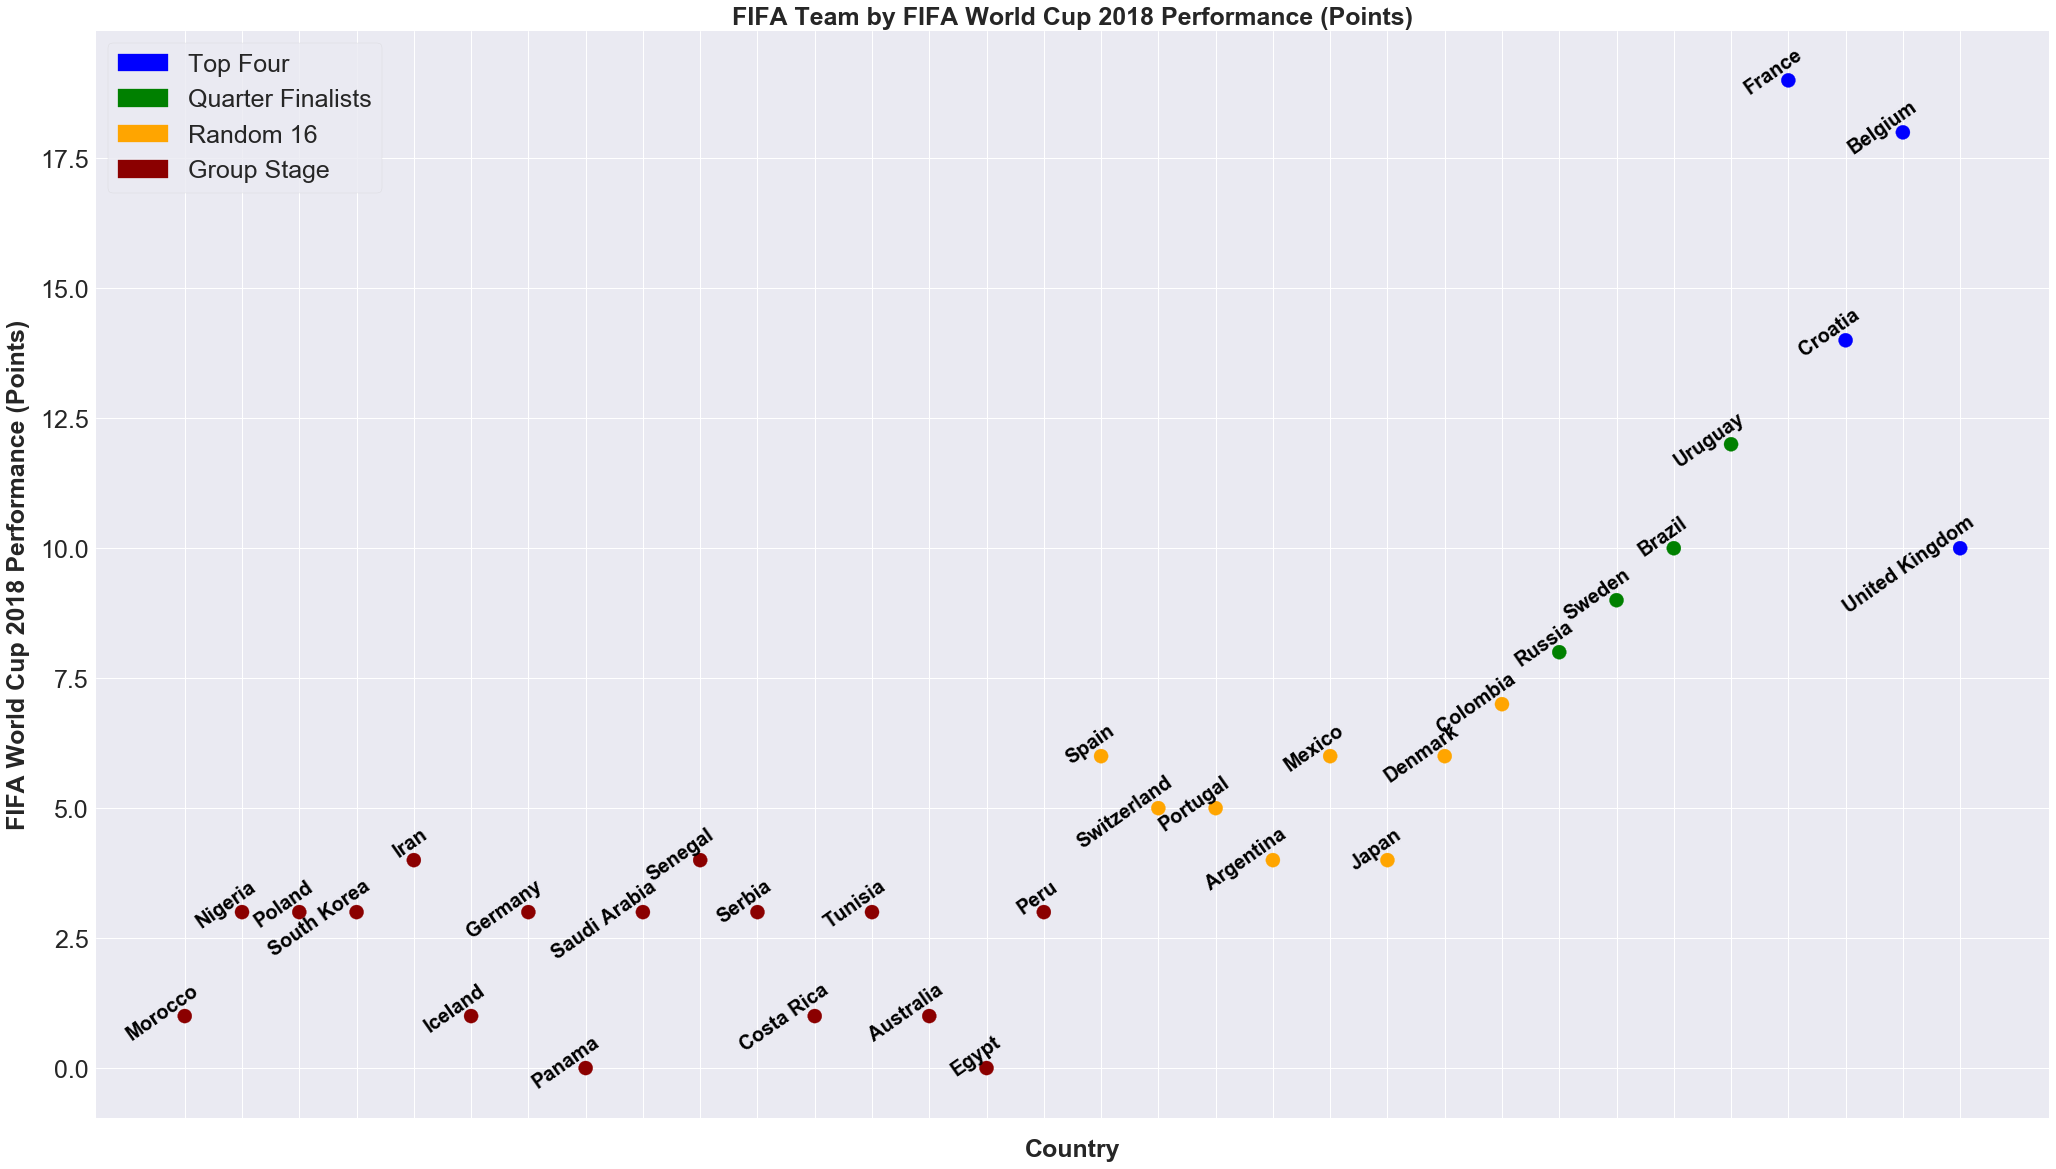

In [23]:
diff=[]
for x in fifa_data["Points"]:
    diff.append(x)

plt.figure(figsize=(35, 20))
for i in range(0, len(fifa_data["Squad"])):
                plt.text (i+.3, diff[i]+.4, s = fifa_data["Squad"].iloc[i], size = 20,
                          fontweight="bold", rotation=35, horizontalalignment='right', color="black")

plt.scatter(fifa_data["Squad"], fifa_data["Points"], s=200, marker='o', c=colormap[categories])
plt.yticks(size=25)
plt.xticks(color="white")
plt.xlabel("Country", fontweight="bold", size=25, labelpad=5)
plt.ylabel("FIFA World Cup 2018 Performance (Points)", fontweight="bold", size=25, labelpad=10)
plt.title("FIFA Team by FIFA World Cup 2018 Performance (Points)", fontweight="bold", size=25)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 25}, frameon=True)
plt.show()

### Investigating GDP per Capita as a Predictor for World Cup Performance

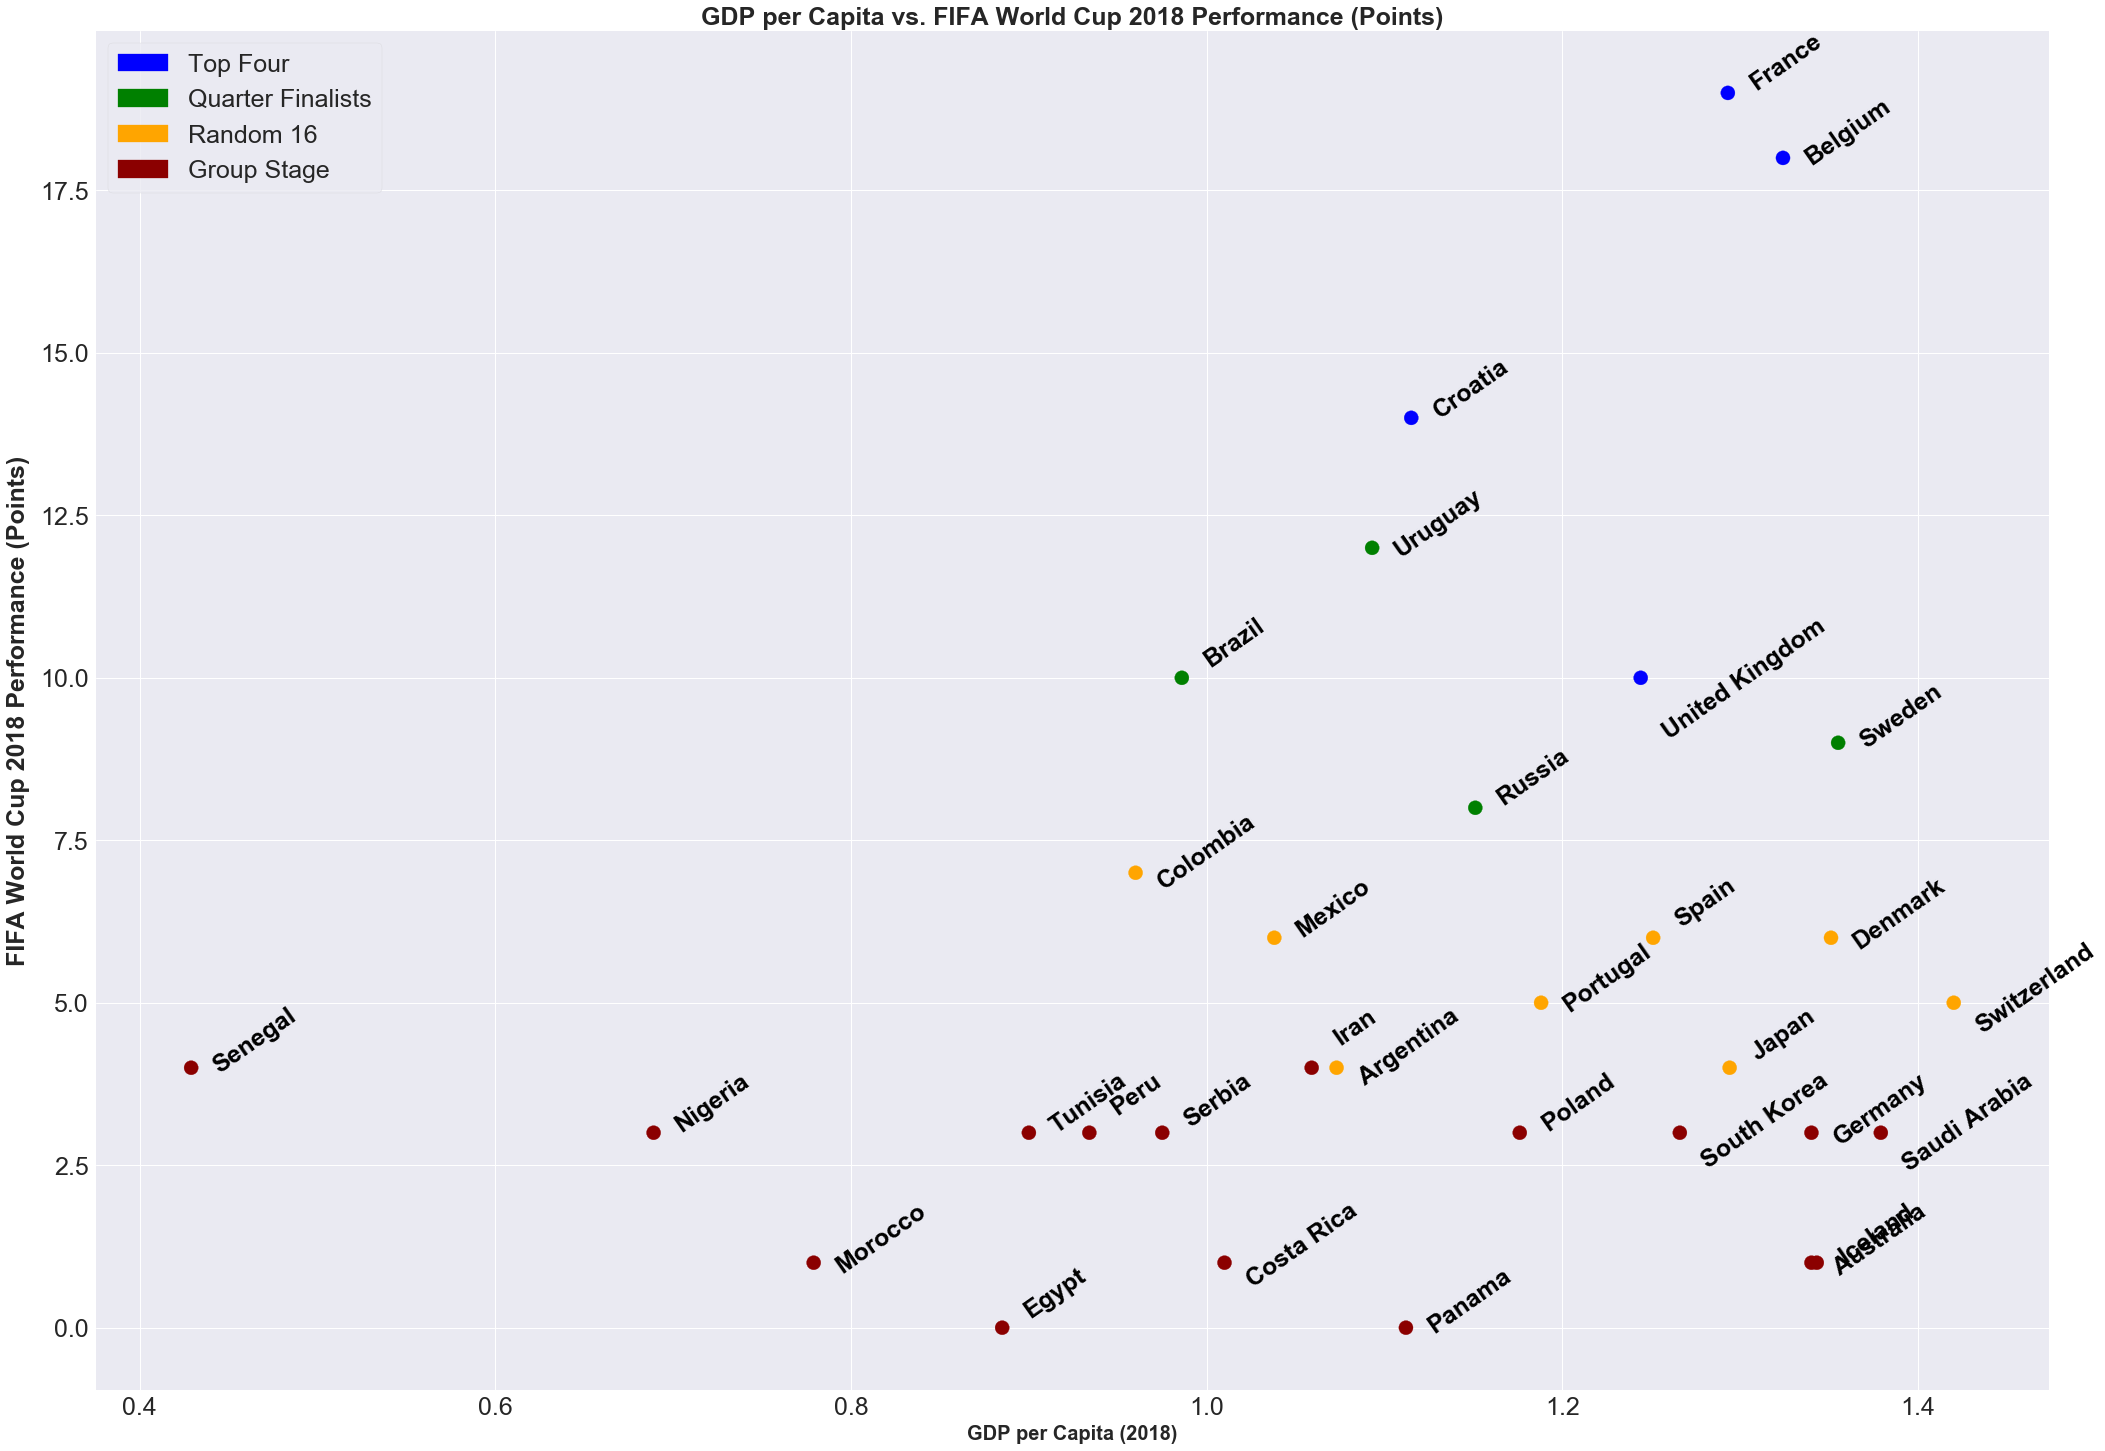

Mean GDP of FIFA World Cup 2018 teams:  1.11725
Mean Points at FIFA World Cup 2018:  5.59375 

Slope: 5.244924083759722
Intercept:  -0.26614143258054934
R-Squared:  0.06089177549558455
Rank Correlation: 0.2198


In [24]:
plt.figure(figsize=(35,25))
plt.scatter( fifa_data["GDP per capita"], fifa_data["Points"], c=colormap[categories], s=200)

for i in range(0, len(fifa_data["Squad"])):
                plt.text (fifa_data["GDP per capita"][i]+.01, fifa_data["Points"][i]+.7, s = fifa_data["Squad"].iloc[i], size = 25,
                         fontweight="bold", rotation=35, horizontalalignment='left', color="black")

plt.xlabel("GDP per Capita (2018)", fontweight="bold", size=20, labelpad=5)
plt.ylabel("FIFA World Cup 2018 Performance (Points)", fontweight="bold", size=25, labelpad=10)
plt.yticks(size=25)
plt.xticks(size=25)
plt.title("GDP per Capita vs. FIFA World Cup 2018 Performance (Points)", fontweight="bold", size=25)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 25}, frameon=True)
plt.show ()

linreg = LinearRegression().fit(fifa_data[["GDP per capita"]], fifa_data[["Points"]])
rank_correlation = spearmanr(fifa_data["GDP per capita"], fifa_data["Points"])

print ("Mean GDP of FIFA World Cup 2018 teams: ", fifa_data["GDP per capita"].mean())
print ("Mean Points at FIFA World Cup 2018: ", fifa_data["Points"].mean(), "\n")
print ("Slope:", linreg.coef_[0][0])
print ("Intercept: ", linreg.intercept_[0])
print ("R-Squared: ", linreg.score(fifa_data[["GDP per capita"]], fifa_data[["Points"]]))
print('Rank Correlation: {:.4f}'.format(rank_correlation.correlation))

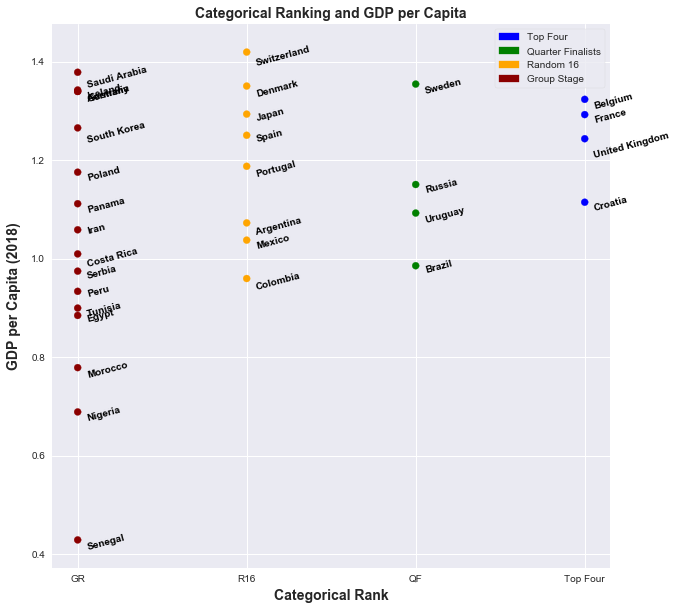

In [25]:
plt.figure(figsize=(10,10))
for i in range(0, len(fifa_data["GDP per capita"])):
                plt.text (fifa_data["Colors"][i]+.05, fifa_data["GDP per capita"][i], s = fifa_data["Squad"].iloc[i], size = 10,
                         fontweight="bold", rotation=15, horizontalalignment='left', color="black")
        
plt.scatter( fifa_data["Categorical_Rank"], fifa_data["GDP per capita"], c=colormap[categories])
plt.xlabel("Categorical Rank", fontweight="bold", size=14, labelpad=5)
plt.ylabel("GDP per Capita (2018)", fontweight="bold", size=14, labelpad=10)
plt.title("Categorical Ranking and GDP per Capita", fontweight="bold", size=14)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 10}, frameon=True)
plt.show()

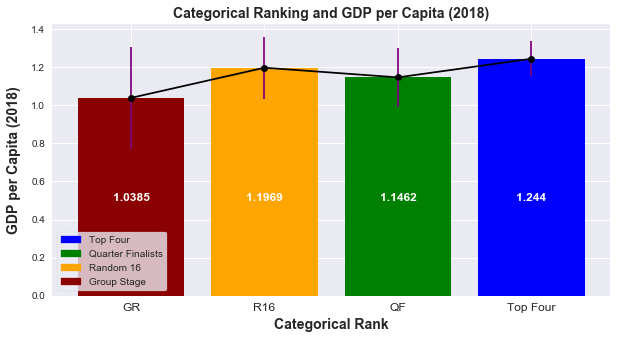

In [26]:
#main plot for bar chart
plt.figure(figsize=(10,5))
plt.bar(order, grouped_mean_data['GDP per capita'], yerr=grouped_std_data['GDP per capita'],
            align="center", ecolor='purple',capsize=10, color=colormap)
plt.plot(order, grouped_mean_data['GDP per capita'], "o-", color="black")
       
#showing the mean on the bars
for i in range(0, 4):
                plt.text (i, .5, s = round(grouped_mean_data['GDP per capita'].iloc[i], 4), size = 12,
                          fontweight="bold", rotation=0, horizontalalignment='center', color="white")
        
#plot labels
plt.xticks(range(0, 4),rotation=0, size=12)
plt.xlabel("Categorical Rank", fontweight="bold", size=14, labelpad=5)
plt.ylabel("GDP per Capita (2018)", fontweight="bold", size=14, labelpad=10)
plt.title("Categorical Ranking and GDP per Capita (2018)", fontweight="bold", size=14)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 10}, frameon=True)
plt.show()     

### Investigating Agricultural Index as a predictor for World Cup Performance

In [27]:
#Casting and Sorting list of strings to floats for plot below
fifa_data["Economy: Industry (% of GVA)_x"] = fifa_data["Economy: Industry (% of GVA)_x"].astype({"Economy: Industry (% of GVA)_x":float})

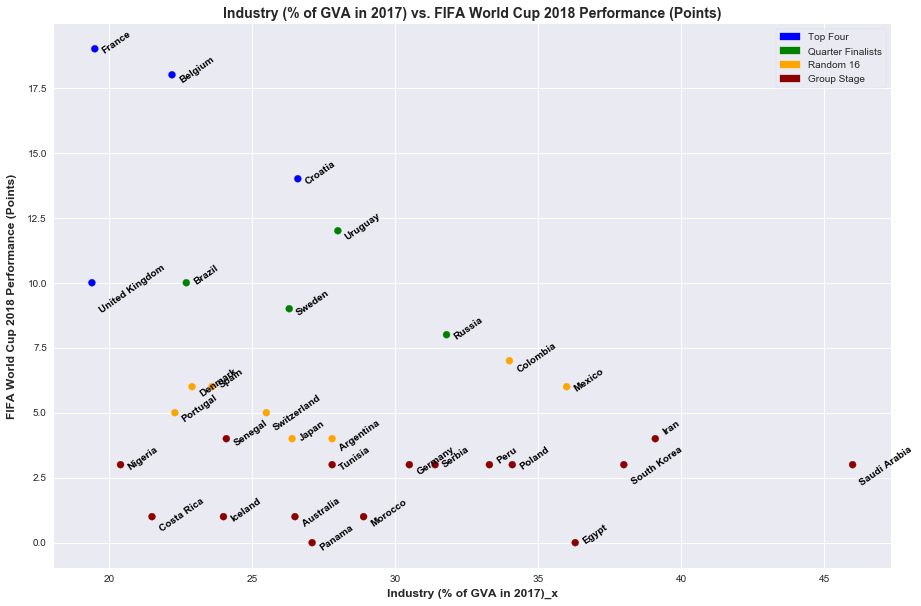

Slope: -0.27212985845877335
Intercept:  13.281418501460347
R-Squared:  0.1289512696101549
Rank Correlation: -0.3302


In [28]:
plt.figure(figsize=(15,10))
plt.scatter( fifa_data["Economy: Industry (% of GVA)_x"], fifa_data["Points"], c=colormap[categories])
for i in range(0, len(fifa_data["Squad"])):
                plt.text (fifa_data["Economy: Industry (% of GVA)_x"][i]+.2, fifa_data["Points"][i]+.5, s = fifa_data["Squad"].iloc[i], size = 10,
                         fontweight="bold", rotation=35, horizontalalignment='left', color="black")
plt.xlabel("Industry (% of GVA in 2017)_x", fontweight="bold", size=12, labelpad=5)
plt.ylabel("FIFA World Cup 2018 Performance (Points)", fontweight="bold", size=12, labelpad=10)
plt.title("Industry (% of GVA in 2017) vs. FIFA World Cup 2018 Performance (Points)", fontweight="bold", size=14)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 10}, frameon=True)
plt.show ()

linreg = LinearRegression().fit(fifa_data[["Economy: Industry (% of GVA)_x"]], fifa_data[["Points"]])
rank_correlation = spearmanr(fifa_data["Economy: Industry (% of GVA)_x"], fifa_data["Points"])

print ("Slope:", linreg.coef_[0][0])
print ("Intercept: ", linreg.intercept_[0])
print ("R-Squared: ", linreg.score(fifa_data[["Economy: Industry (% of GVA)_x"]], fifa_data[["Points"]]))
print('Rank Correlation: {:.4f}'.format(rank_correlation.correlation))

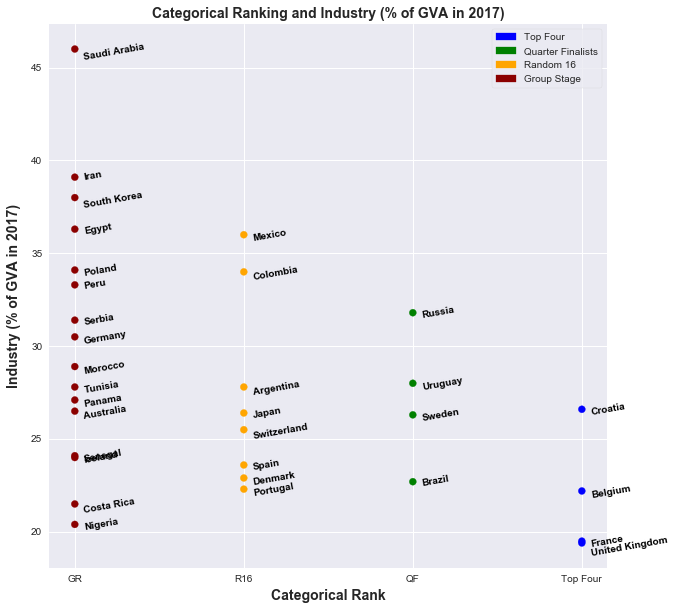

In [37]:
#creating a scatter plot for GDP
plt.figure(figsize=(10,10))
for i in range(0, len(fifa_data["GDP per capita"])):
                plt.text (fifa_data["Colors"][i]+.05, fifa_data["Economy: Industry (% of GVA)_x"][i], s = fifa_data["Squad"].iloc[i], size = 10,
                         fontweight="bold", rotation=10, horizontalalignment='left', color="black")
plt.scatter( fifa_data["Categorical_Rank"], fifa_data["Economy: Industry (% of GVA)_x"], c=colormap[categories])
plt.xlabel("Categorical Rank", fontweight="bold", size=14, labelpad=5)
plt.ylabel("Industry (% of GVA in 2017)", fontweight="bold", size=14, labelpad=10)
plt.title("Categorical Ranking and Industry (% of GVA in 2017)", fontweight="bold", size=14)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 10}, frameon=True)
plt.show()

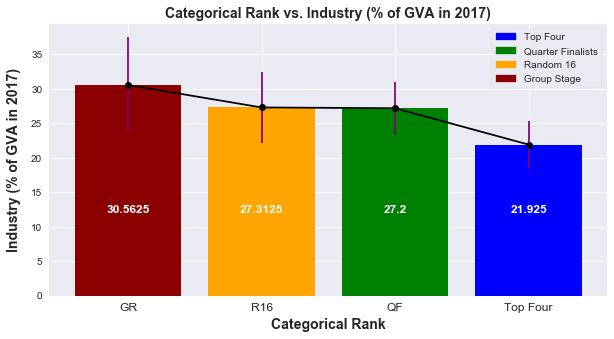

In [30]:
#main plot for bar chart
plt.figure(figsize=(10,5))
plt.bar(order, grouped_mean_data['Economy: Industry (% of GVA)_x'], yerr=grouped_std_data['Economy: Industry (% of GVA)_x'],
            align="center", ecolor='purple',capsize=10, color=colormap)
plt.plot(order, grouped_mean_data['Economy: Industry (% of GVA)_x'], "o-", color="black")
    
       
#showing the mean on the bars
for i in range(0, 4):
                plt.text (i, 12, s = round(grouped_mean_data['Economy: Industry (% of GVA)_x'].iloc[i], 4), size = 12,
                          fontweight="bold", rotation=0, horizontalalignment='center', color="white")
        
#plot labels
plt.xticks(range(0, 4),rotation=0, size=12)
plt.xlabel("Categorical Rank", fontweight="bold", size=14, labelpad=5)
plt.ylabel("Industry (% of GVA in 2017)", fontweight="bold", size=14, labelpad=10)
plt.title("Categorical Rank vs. Industry (% of GVA in 2017)", fontweight="bold", size=14)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 10}, frameon=True)
plt.show()

### Investigating Health and Life Expectancy as a Predictor for World Cup Performance

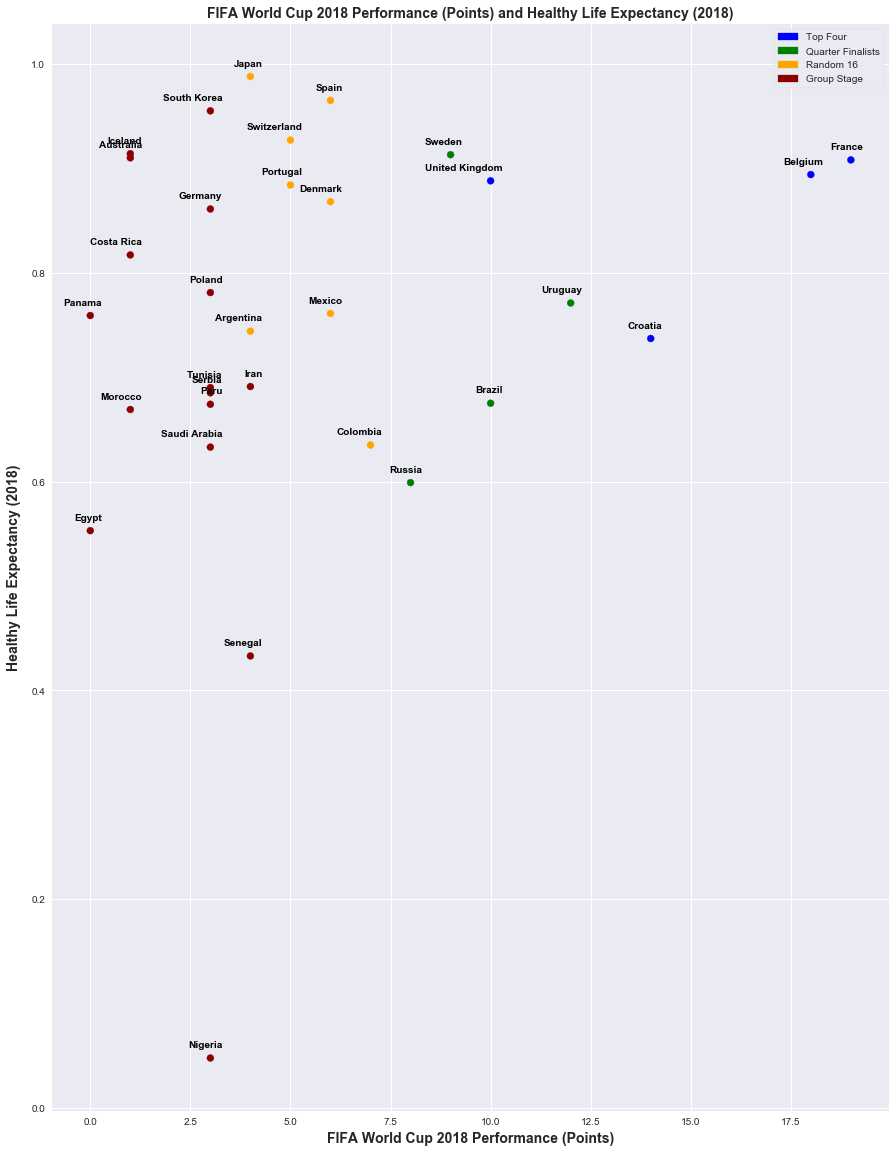

Slope: 5.366330300937427
Intercept:  1.5304317752589425
R-Squared:  0.04345314673318135
Rank Correlation: 0.1815


In [32]:
plt.figure(figsize=(15,20))
plt.scatter( fifa_data["Points"], fifa_data["Healthy life expectancy"], c=colormap[categories])
for i in range(0, len(fifa_data["Squad"])):
                plt.text (fifa_data["Points"][i]+.3, fifa_data["Healthy life expectancy"][i]+.01, s = fifa_data["Squad"].iloc[i], size = 10,
                         fontweight="bold", rotation=0, horizontalalignment='right', color="black")
plt.xlabel("FIFA World Cup 2018 Performance (Points)", fontweight="bold", size=14, labelpad=5)
plt.ylabel("Healthy Life Expectancy (2018)", fontweight="bold", size=14, labelpad=10)
plt.title("FIFA World Cup 2018 Performance (Points) and Healthy Life Expectancy (2018)", fontweight="bold", size=14)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 10}, frameon=True)
plt.show ()

linreg = LinearRegression().fit(fifa_data[["Healthy life expectancy"]], fifa_data[["Points"]])
rank_correlation = spearmanr(fifa_data["Healthy life expectancy"], fifa_data["Points"])

print ("Slope:", linreg.coef_[0][0])
print ("Intercept: ", linreg.intercept_[0])
print ("R-Squared: ", linreg.score(fifa_data[["Healthy life expectancy"]], fifa_data[["Points"]]))
print('Rank Correlation: {:.4f}'.format(rank_correlation.correlation))

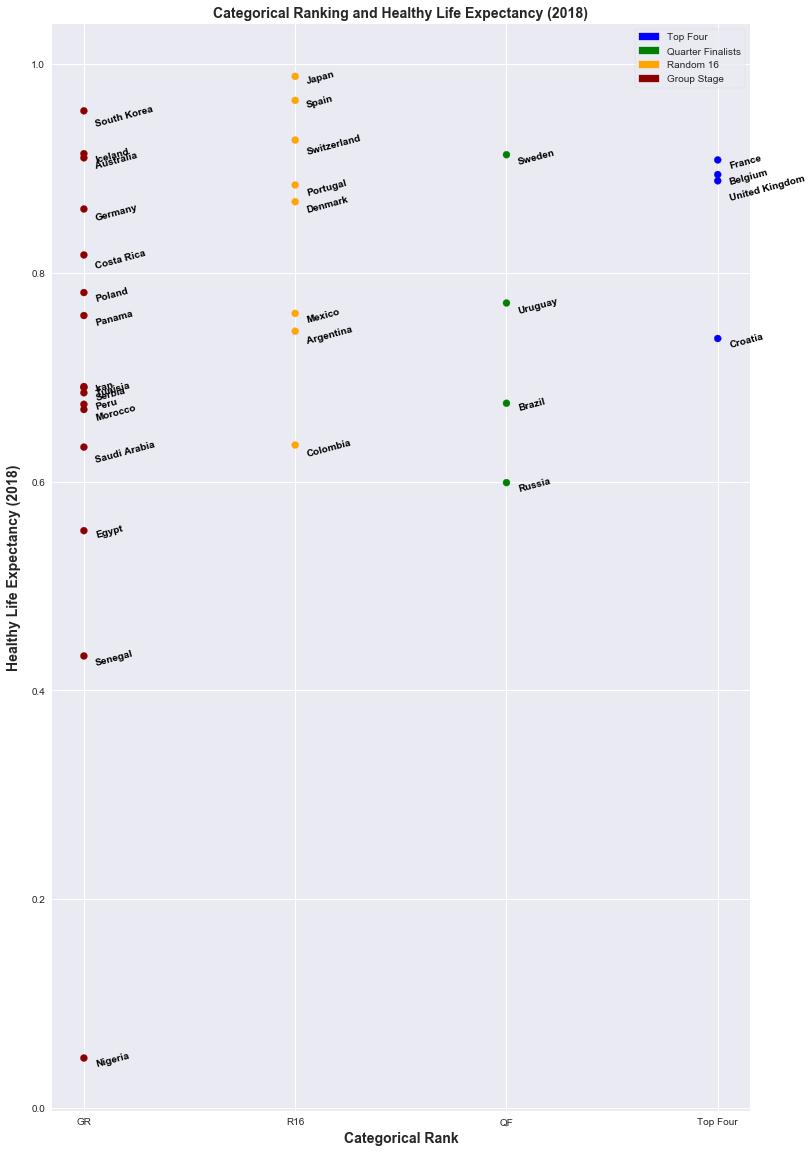

In [33]:
plt.figure(figsize=(12.5,20))
for i in range(0, len(fifa_data["GDP per capita"])):
                plt.text (fifa_data["Colors"][i]+.05, fifa_data["Healthy life expectancy"][i], s = fifa_data["Squad"].iloc[i], size = 10,
                         fontweight="bold", rotation=15, horizontalalignment='left', color="black")
plt.scatter( fifa_data["Categorical_Rank"], fifa_data["Healthy life expectancy"], c=colormap[categories])
plt.xlabel("Categorical Rank", fontweight="bold", size=14, labelpad=5)
plt.ylabel("Healthy Life Expectancy (2018)", fontweight="bold", size=14, labelpad=10)
plt.title("Categorical Ranking and Healthy Life Expectancy (2018)", fontweight="bold", size=14)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 10}, frameon=True)
plt.show ()

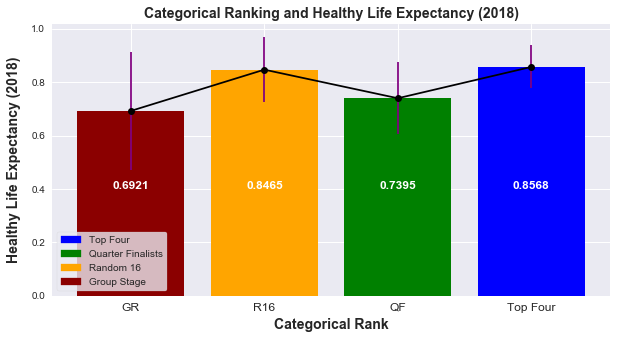

In [34]:
#main plot for bar chart
plt.figure(figsize=(10,5))
plt.bar(order, grouped_mean_data['Healthy life expectancy'], yerr=grouped_std_data['Healthy life expectancy'],
            align="center", ecolor='purple',capsize=10, color=colormap)
plt.plot(order, grouped_mean_data['Healthy life expectancy'], "o-", color="black")
    
       
#showing the mean on the bars
for i in range(0, 4):
                plt.text (i, .4, s = round(grouped_mean_data['Healthy life expectancy'].iloc[i], 4), size = 12,
                          fontweight="bold", rotation=0, horizontalalignment='center', color="white")
        
#plot labels
plt.xticks(range(0, 4),rotation=0, size=12)
plt.xlabel("Categorical Rank", fontweight="bold", size=14, labelpad=5)
plt.ylabel("Healthy Life Expectancy (2018)", fontweight="bold", size=14, labelpad=10)
plt.title("Categorical Ranking and Healthy Life Expectancy (2018)", fontweight="bold", size=14)
plt.legend(handles=[topfour_patch, qf_patch, r16_patch, gr_patch], prop={'size': 10}, frameon=True)
plt.show()

## Leftovers

These are some guiding questions for the analysis:

. How are we grouping the data? By "Rk", by region?, are we incorporating other data?
. What are the trends we are trying to see?
. Do we want to ask if a losing team could potentially beat the champion team?


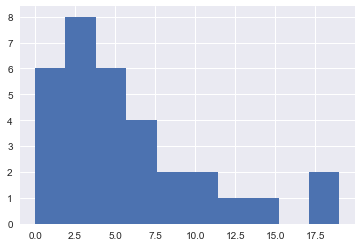

In [35]:
#Creating a histogram of Wins
plt.hist(fifa["Points"], bins=10)
plt.show()

[1 1 4 ... 3 1 2]
{1: 0.50005001, 2: 0.24990928, 3: 0.12504629, 4: 0.06249752, 5: 0.03126412, 6: 0.01562448, 7: 0.00780297, 8: 0.00390221, 9: 0.00194856, 10: 0.00097757, 11: 0.00048991, 12: 0.00024384, 13: 0.00012237, 14: 6.087e-05, 15: 3.063e-05, 16: 1.483e-05, 17: 7.42e-06, 18: 3.67e-06, 19: 1.65e-06, 20: 8e-07, 21: 4.7e-07, 22: 2.3e-07, 23: 1.5e-07, 24: 8e-08, 25: 4e-08, 27: 1e-08, 29: 1e-08, 31: 1e-08}
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 29 31]
100000000


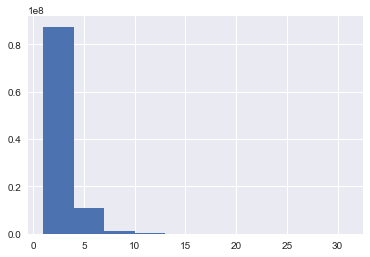

In [36]:
z = np.random.geometric(p=0.5, size=100000000)
print (z)
unique, counts = np.unique(z, return_counts=True)
counts = dict(zip(unique, counts/100000000))
print (counts)
print (np.unique(z))
print (len(z))
plt.hist(z)
plt.show()

## Conclusions

"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

## Acknowledgements

**These are the places that inspired code for our project:**  
Sorting a List by a Specific Order
https://www.programiz.com/python-programming/methods/list/sort

Making a Legend  
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

Coloring Individual Points on a Graph  
https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
https://stackoverflow.com/questions/33287156/specify-color-of-each-point-in-scatter-plot-matplotlib

Coloring Each Bar in a Bar Chart  
https://python-graph-gallery.com/3-control-color-of-barplots/ 

https://arxiv.org/pdf/1803.09010.pdf). We expect the total length should be 1500-3000 words. Inside this range, length will not be a factor in grading.

The Introduction should be the exposition of the article where you can use less rigorous language. Your language should be generally accessible. Aim for this to be readable by someone who hasn't taken this class (maybe your roommate, your family, or you at the start of the semester). It should still be formal, but someone should come to the end and want to read more. 538 articles (fivethirtyeight.com) might be a good baseline tone for this.

Advanced introductions will immediately tell us what the setting is, what you found, and why it matters. They will add details as they are needed. Language will be polished and free from errors (Note: if your group does not include a native English speaker, make a note of that). Beginning writeups will be less focused and organized. They may jump to technical details without explaining why results are important. They may have spelling and grammatical errors, or awkward or incomplete sentences, indicating that they were written in haste and never reviewed.

Datasheet: As described above, in the style of Gebru et al. Think of this as the “origin story” of your data set. Answer all of the questions listed in the previous section. You can write this in any style as long as it's easy to read as a Q&A. Datasheet will be graded on content, not style. Follow sections 3.1- 3.5 (Motivation to Uses) from https://arxiv.org/pdf/1803.09010.pdf.

Data analysis and evaluation of significance: Here you will clearly detail your methods used in each part. Qualitative claims made in the exposition should have numerical backing here (instead of “X is larger than Y” write “X is 3.65 times larger than Y”). This should read like a scientific paper, but does not need to be "stuffy" or overly indirect: "we did ..." is more natural than "... was done". A reader should be able to replicate your experiments and findings via their own code after reading this.

It’s important to organize your analysis. Common organizational patterns: 

Big to small. Start with a high-level description of the complete dataset, then add more detail and increase specificity until you are looking at individual data points.
Small to big. The opposite: start with individual data points, then “zoom out” progressively until you get to a broad, top-level overview.
Bites at the apple. Visit different facets of the dataset. This could be subsets of the observations along different criteria, or a series of aggregate views where you are grouping by different variables (eg alumni by state, then by industry, then by major).

In most cases you will try many possible analyses. You don't have to report everything that you did. Find a good selection that makes sense. In most datasets there are potentially thousands of different functions that you could analyze. Why are the ones you chose the most interesting?

Advanced analyses will be clear, logical, and methodical. Mathematical modeling will have clear purpose that answers relevant questions and contributes to an overall perspective. Results will be contextualized with significance tests or comparisons to alternative simpler explanations. Reasonable "next questions" should be followed or acknowledged, though you don't have to follow every lead. Beginning analyses will be disorganized and haphazard. They will apply models without context or purpose. They report results without considering whether those results are meaningful or random noise.

Code: As notebooks with evaluated cells. We won't run them or attempt to debug errors. The most crucial part is to comment your code so that we can quickly understand what it does. This doesn't need to be exhaustive, but you should be keeping your reader updated on what's going on every few lines. Some code may be oriented towards pre-processing and data curation, other code may be oriented towards analysis and presentation of results.

Advanced code will be succinct and well-organized, with comments that indicate expected uses and assumptions for inputs and outputs. Repeated tasks will be broken into functions. Variable names will be informative. Points of failure are anticipated and checked for.

Beginning code will be unclear and disorganized, possibly with large sections of unused code. Variable names will be ambiguous or misleading. Comments will be missing or will simply repeat information that is obvious from context. Variables will be short and uninformative.

Conclusions should reflect on what you accomplished and where you might go from here. These can be hard to write without feeling repetitive. The conclusion is a good place to mention things that you tried that did not work, or data that you could not find but that you would add in a hypothetical further version.

A common question is "do I need to ... to get a good grade?" 

It's an open-ended project with additive grading. We only give points for what you do, we never take points off for what you don't do. There are many things that we consider difficult (combining multiple datasets, reformatting data, collecting from web pages), so if you find that any of them make sense, we will recognize that in our consideration of how ambitious you are. None of them are required.

What we want you to do is make an argument based on a data set. If the perfect data set already exists, great! You have more time to work on the details of the modeling and the presentation. In many cases the data set you want doesn't exist in the form you are looking for, and you need to do some work to create it. We want you to have tools to do that if needed. But even if you think you have exactly the data you want, you may find that in investigating it you realize that there are additional questions that require more data collection.

Students often find this kind of open-ended project difficult because it requires more independence and feels more risky. We've built in multiple low-stakes checkpoints to help make sure we give you feedback and reduce the feeling of "flying blind". But it's also the most realistic and valuable experience to prepare you for what you will do after graduation, and the thing that alums most often remember years later.

I also recognize that doing open-ended projects is more difficult than it has been other years. It's harder to meet with teammates and with course staff. We will take this into account when giving final scores.
